In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

import random
import requests

import time

# Import API key
from config import API_Key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
Lat_Range = (-90, 90)
Lng_Range = (-180, 180)

In [2]:
# Create a set of random lat and lng combinations
Lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
Lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

#Create a dataframe
Lat_Lngs = pd.DataFrame({"Latitude": Lats, "Longitude": Lngs})
Lat_Lngs.head()

,Latitude,Longitude
0,-71.501092,171.701728
1,82.846092,-39.406881
2,33.686492,-51.744064
3,3.762890,-149.713696
4,1.478723,21.122046


In [3]:
# Make new columns in data frame to fill in with city data
Lat_Lngs["City"] = ""
Lat_Lngs["Country"] = ""

# Identify nearest city for each Lat, Lng combination and write into the DF
for index, row in Lat_Lngs.iterrows():
    City = citipy.nearest_city(row["Latitude"], row["Longitude"])
    Lat_Lngs.set_value(index, "City", City.city_name)
    Lat_Lngs.set_value(index, "Country", City.country_code)

# Remove duplicate data
Lat_Lngs = Lat_Lngs.drop_duplicates(["City"], keep='first')
Lat_Lngs.count()

C:\Users\admin\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\admin\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':


Latitude     607
Longitude    607
City         607
Country      607
dtype: int64

In [4]:
# OpenWeatherMap API Key
Api_Key = API_Key

# Base URL for Weather Map API Call
Base_URL = "http://api.openweathermap.org/data/2.5/weather?q="

Lat_Lngs["Temperature"] = ""
Lat_Lngs["Humidity"] = ""
Lat_Lngs["Cloudiness"] = ""
Lat_Lngs["Wind Speed"] = ""

Sleep_Counter = 0
Counter = 0
Set_Counter = 1

# Loop through APIs to construct new columns in dataframe
for index, row in Lat_Lngs.iterrows():
    try:
        URL = Base_URL + row["City"].replace(" ","+") + "," + row["Country"] + "&appid=" + Api_Key + "&units=imperial"
        Query = requests.get(URL).json()        
        Lat_Lngs.set_value(index, "Temperature", Query["main"]["temp"])
        Lat_Lngs.set_value(index, "Humidity", Query["main"]["humidity"])
        Lat_Lngs.set_value(index, "Cloudiness", Query["clouds"]["all"])
        Lat_Lngs.set_value(index, "Wind Speed", Query["wind"]["speed"])
    except:
        Lat_Lngs.set_value(index, "Temperature", "FAIL")
    
    Counter += 1
    Sleep_Counter += 1
    
    # Minimize overloading weather API
    if Sleep_Counter == 40:
        print("------------------------------------------")
        time.sleep(10)
        print("")
        Sleep_Counter = 0
        Set_Counter += 1
    
    # Printing Records
    print("Retrieving Record " + str(Counter) + " of Set " + str(Set_Counter) +" | " + row["City"])

C:\Users\admin\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\admin\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\admin\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\admin\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


Retrieving Record 1 of Set 1 | bluff
Retrieving Record 2 of Set 1 | tasiilaq
Retrieving Record 3 of Set 1 | saint george
Retrieving Record 4 of Set 1 | hilo
Retrieving Record 5 of Set 1 | bongandanga
Retrieving Record 6 of Set 1 | namatanai
Retrieving Record 7 of Set 1 | belushya guba


C:\Users\admin\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


Retrieving Record 8 of Set 1 | airai
Retrieving Record 9 of Set 1 | chakulia
Retrieving Record 10 of Set 1 | luderitz
Retrieving Record 11 of Set 1 | vila
Retrieving Record 12 of Set 1 | mar del plata
Retrieving Record 13 of Set 1 | lang suan
Retrieving Record 14 of Set 1 | ribeira grande
Retrieving Record 15 of Set 1 | amderma
Retrieving Record 16 of Set 1 | tuktoyaktuk
Retrieving Record 17 of Set 1 | quatre cocos
Retrieving Record 18 of Set 1 | qaanaaq
Retrieving Record 19 of Set 1 | burnie
Retrieving Record 20 of Set 1 | avera
Retrieving Record 21 of Set 1 | illoqqortoormiut
Retrieving Record 22 of Set 1 | busselton
Retrieving Record 23 of Set 1 | provideniya
Retrieving Record 24 of Set 1 | la ronge
Retrieving Record 25 of Set 1 | alice springs
Retrieving Record 26 of Set 1 | vaini
Retrieving Record 27 of Set 1 | nanortalik
Retrieving Record 28 of Set 1 | cuiluan
Retrieving Record 29 of Set 1 | moose factory
Retrieving Record 30 of Set 1 | bundaberg
Retrieving Record 31 of Set 1 | t

------------------------------------------

Retrieving Record 200 of Set 6 | aklavik
Retrieving Record 201 of Set 6 | northam
Retrieving Record 202 of Set 6 | zhigansk
Retrieving Record 203 of Set 6 | san jose
Retrieving Record 204 of Set 6 | petropavlovsk-kamchatskiy
Retrieving Record 205 of Set 6 | grindavik
Retrieving Record 206 of Set 6 | mirabad
Retrieving Record 207 of Set 6 | manavalakurichi
Retrieving Record 208 of Set 6 | ati
Retrieving Record 209 of Set 6 | dodoma
Retrieving Record 210 of Set 6 | marion
Retrieving Record 211 of Set 6 | nanga eboko
Retrieving Record 212 of Set 6 | victor harbor
Retrieving Record 213 of Set 6 | kudahuvadhoo
Retrieving Record 214 of Set 6 | kadoma
Retrieving Record 215 of Set 6 | muscatine
Retrieving Record 216 of Set 6 | martinsburg
Retrieving Record 217 of Set 6 | egvekinot
Retrieving Record 218 of Set 6 | pinega
Retrieving Record 219 of Set 6 | belyy yar
Retrieving Record 220 of Set 6 | ariquemes
Retrieving Record 221 of Set 6 | saint-augusti

Retrieving Record 387 of Set 10 | kuloy
Retrieving Record 388 of Set 10 | alta floresta
Retrieving Record 389 of Set 10 | rock springs
Retrieving Record 390 of Set 10 | gravdal
Retrieving Record 391 of Set 10 | coahuayana
Retrieving Record 392 of Set 10 | qui nhon
Retrieving Record 393 of Set 10 | yaan
Retrieving Record 394 of Set 10 | tukrah
Retrieving Record 395 of Set 10 | talnakh
Retrieving Record 396 of Set 10 | rungata
Retrieving Record 397 of Set 10 | great falls
Retrieving Record 398 of Set 10 | nola
Retrieving Record 399 of Set 10 | dunedin
------------------------------------------

Retrieving Record 400 of Set 11 | lao cai
Retrieving Record 401 of Set 11 | ivankiv
Retrieving Record 402 of Set 11 | spornoye
Retrieving Record 403 of Set 11 | alexandria
Retrieving Record 404 of Set 11 | peniche
Retrieving Record 405 of Set 11 | berlevag
Retrieving Record 406 of Set 11 | novikovo
Retrieving Record 407 of Set 11 | omboue
Retrieving Record 408 of Set 11 | seoul
Retrieving Record 4

Retrieving Record 571 of Set 15 | whitianga
Retrieving Record 572 of Set 15 | binika
Retrieving Record 573 of Set 15 | francavilla fontana
Retrieving Record 574 of Set 15 | hasaki
Retrieving Record 575 of Set 15 | homer
Retrieving Record 576 of Set 15 | wajima
Retrieving Record 577 of Set 15 | merauke
Retrieving Record 578 of Set 15 | lorengau
Retrieving Record 579 of Set 15 | maroantsetra
Retrieving Record 580 of Set 15 | anzio
Retrieving Record 581 of Set 15 | san francisco
Retrieving Record 582 of Set 15 | eyl
Retrieving Record 583 of Set 15 | port-gentil
Retrieving Record 584 of Set 15 | meulaboh
Retrieving Record 585 of Set 15 | sangar
Retrieving Record 586 of Set 15 | carballo
Retrieving Record 587 of Set 15 | lolua
Retrieving Record 588 of Set 15 | sernur
Retrieving Record 589 of Set 15 | comodoro rivadavia
Retrieving Record 590 of Set 15 | taoudenni
Retrieving Record 591 of Set 15 | atherton
Retrieving Record 592 of Set 15 | baijiantan
Retrieving Record 593 of Set 15 | arusha
R

In [5]:
# Eliminate rows with missing data and run final count
Weather_Data = Lat_Lngs.loc[Lat_Lngs["Temperature"] != "FAIL", :]

# Export the Weather Data into csv
Weather_Data.to_csv("Weather_Data.csv")

print(Weather_Data.count())
Weather_Data.head()

Latitude       514
Longitude      514
City           514
Country        514
Temperature    514
Humidity       514
Cloudiness     514
Wind Speed     514
dtype: int64


,Latitude,Longitude,City,Country,Temperature,Humidity,Cloudiness,Wind Speed
0,-71.501092,171.701728,bluff,nz,60.77,96,68,6.67
1,82.846092,-39.406881,tasiilaq,gl,22.07,100,88,24.34
2,33.686492,-51.744064,saint george,bm,64.4,52,20,6.93
3,3.762890,-149.713696,hilo,us,68,54,1,10.29
4,1.478723,21.122046,bongandanga,cd,87.55,45,8,4.76


In [6]:
# Create new dataframe to facilitate plotting
Temp = Weather_Data[["Latitude", "Temperature"]]
Hum = Weather_Data[["Latitude", "Humidity"]]
Cloud = Weather_Data[["Latitude", "Cloudiness"]]
Wind_Speed = Weather_Data[["Latitude", "Wind Speed"]]

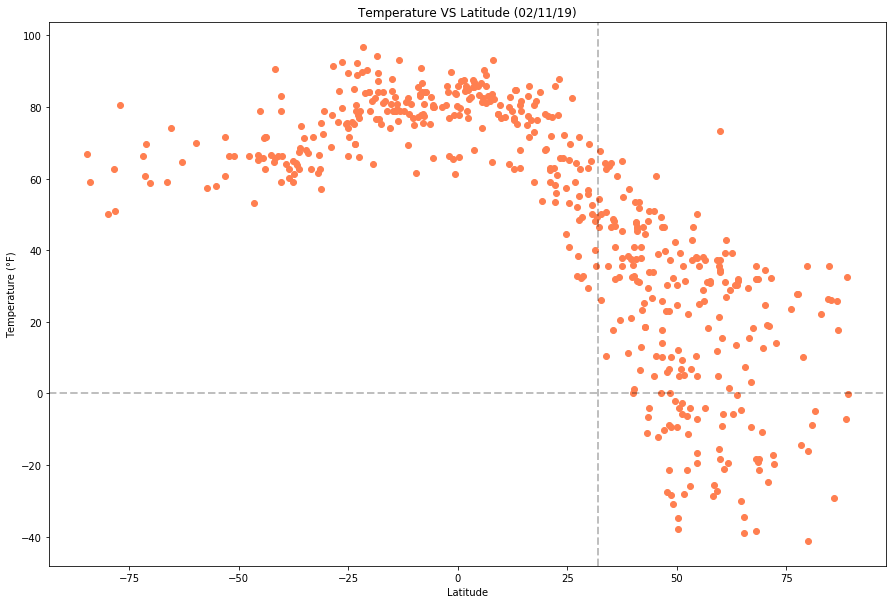

In [7]:
# Temperature VS Latitude Scatter Plot
plt.figure(figsize=(15,10))
plt.scatter(Temp["Latitude"], Temp["Temperature"], color = "Coral")
plt.title("Temperature VS Latitude (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Temperature (°F)")
plt.axhline(y=0, linestyle='--', linewidth = 2, color = "black", alpha=.25)
plt.axvline(x=32, linestyle = "--", linewidth = 2, color = "black", alpha = .25)

plt.savefig("Images/Temperature_VS_Latitude.jpg")
plt.show()

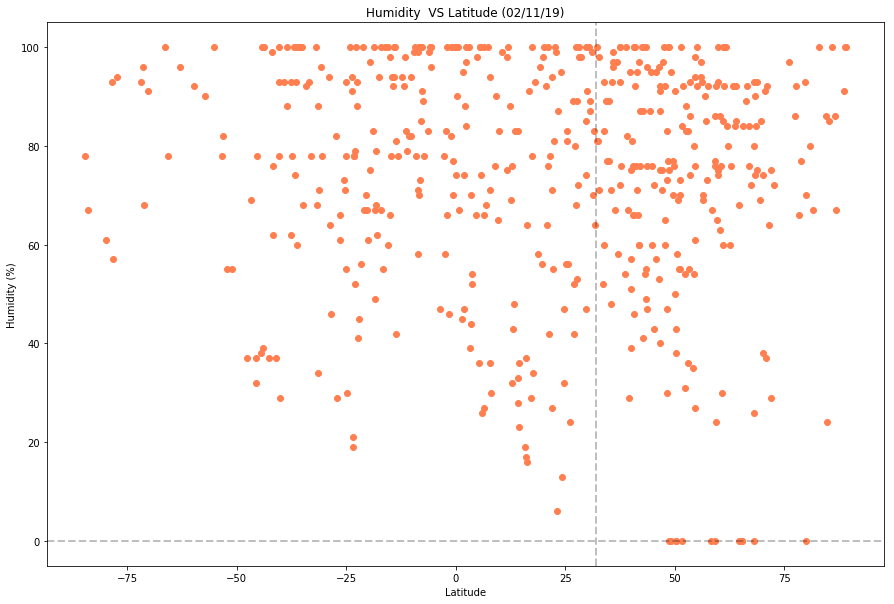

In [8]:
# Humidity VS Latitude Scatter Plot
plt.figure(figsize=(15,10))
plt.scatter(Hum["Latitude"], Hum["Humidity"], color = "Coral")
plt.title("Humidity  VS Latitude (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.axhline(y=0, linestyle='--', linewidth = 2, color = "black", alpha=.25)
plt.axvline(x=32, linestyle = "--", linewidth = 2, color = "black", alpha = .25)
plt.savefig("Images/Humidity_VS_Latitude.jpg")
plt.show()

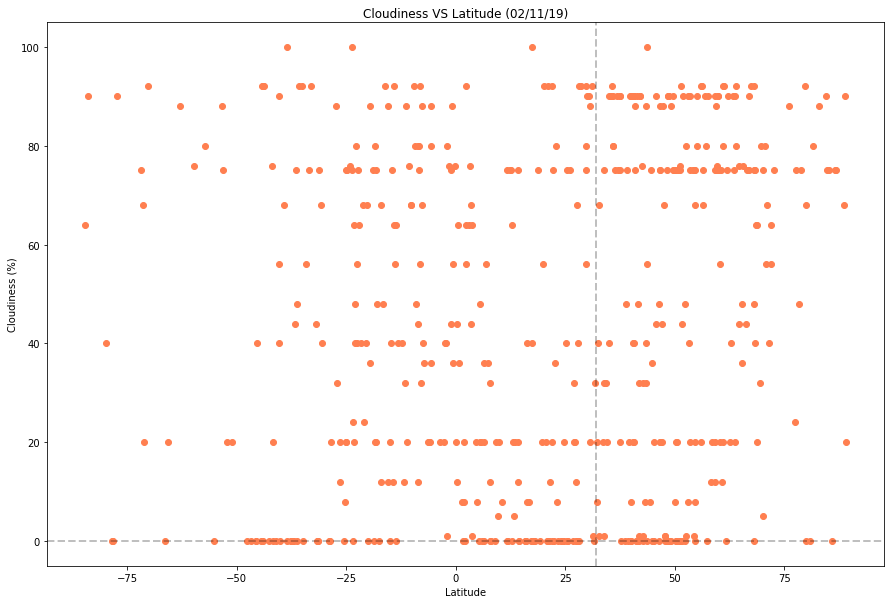

In [9]:
# Cloudiness VS Latitude Scatter Plot
plt.figure(figsize=(15,10))
plt.scatter(Cloud["Latitude"], Cloud["Cloudiness"], color = "Coral")
plt.title("Cloudiness VS Latitude (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.axhline(y=0, linestyle='--', linewidth = 2, color = "black", alpha=.25)
plt.axvline(x=32, linestyle = "--", linewidth = 2, color = "black", alpha = .25)
plt.savefig("Images/Cloudiness_VS_Latitude.jpg")
plt.show()

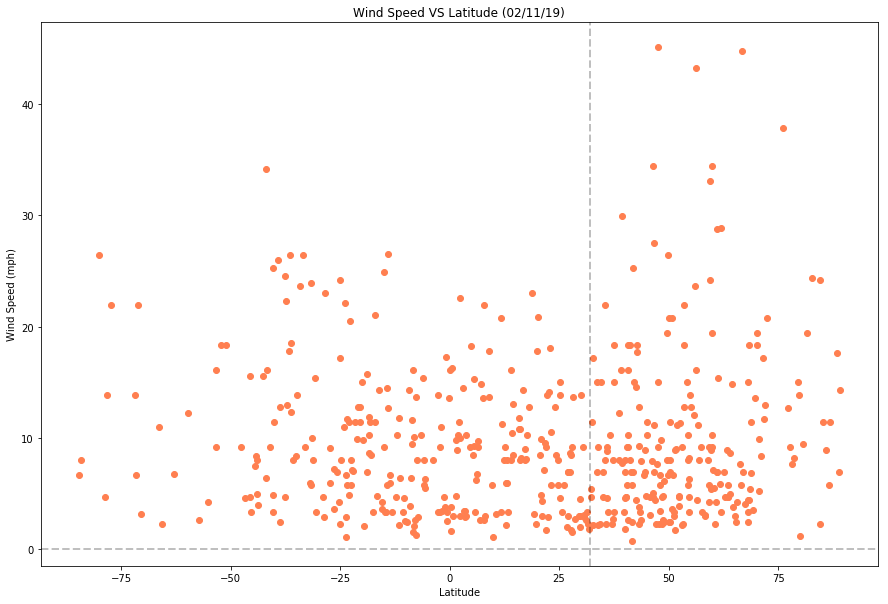

In [10]:
# Wind Speed VS Latitude Scatter Plot
plt.figure(figsize=(15,10))
plt.scatter(Wind_Speed["Latitude"], Wind_Speed["Wind Speed"], color = "Coral")
plt.title("Wind Speed VS Latitude (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.axhline(y=0, linestyle='--', linewidth = 2, color = "black", alpha=.25)
plt.axvline(x=32, linestyle = "--", linewidth = 2, color = "black", alpha = .25)
plt.savefig("Images/Wind_Speed_VS_Latitude.jpg")
plt.show()